# KNN Implementation

# 

Here, we will get the same datapoints as the book does.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X1 = [3.393533211, 3.110073483, 1.343808831,
      3.582294042, 2.280362439, 7.423436942,
      5.745051997, 9.172168622, 7.792783481,
      7.939820817]

X2 = [2.331273381, 1.781539638, 3.368360954,
      4.67917911, 2.866990263, 4.696522875,
      3.533989803, 2.511101045, 3.424088941,
      0.791637231]

y = [0] * 5 + [1] * 5

In [3]:
df = pd.DataFrame({"x1":X1, 
                   "x2":X2,
                   "y":y})
df

,x1,x2,y
0,3.393533,2.331273,0
1,3.110073,1.781540,0
2,1.343809,3.368361,0
3,3.582294,4.679179,0
4,2.280362,2.866990,0
5,7.423437,4.696523,1
6,5.745052,3.533990,1
7,9.172169,2.511101,1
8,7.792783,3.424089,1
9,7.939821,0.791637,1


Data Looks like... ↓

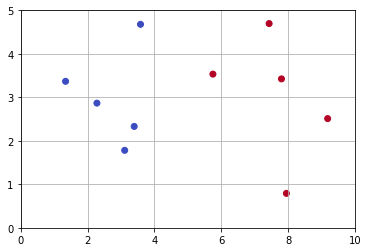

In [4]:
plt.scatter(df.x1, df.x2, c=df.y, cmap="coolwarm")
plt.xlim([0, 10])
plt.ylim([0, 5])
plt.grid();

# 

So, what will we do... 

    As we don't have to do any form of training, we will take the datapoint and then compare
    its features to those in the dataset.
     
    Here, we are going to do that for one pair only.

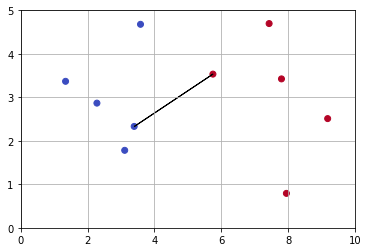

In [5]:
plt.scatter(df.x1, df.x2, c=df.y, cmap="coolwarm")

x1 = 3.399353; y1 = 2.331271
x2 = 5.745052; y2 = 3.533990
plt.arrow(x1, y1, x2 - x1, y2 - y1)
plt.xlim([0, 10])
plt.ylim([0, 5])
plt.grid();

So we want to find the `Euclidean Distance` beteen these 2 points. Let's find how.

###### 

— Remember the ED formula
### $ ED = \sqrt {\sum (A - B)^2} $

In [6]:
# Step - 1. Get the Squared Difference
Sq_diff_x = (x1 - x2) ** 2
Sq_diff_y = (y1 - y2) ** 2

In [7]:
# Step - 2. Sum the squared diff
sum_x1_x2 = Sq_diff_x + Sq_diff_y

In [8]:
# Step - 3. Find the distance!
sum_x1_x2 ** 0.5 # SQRT

2.6360646410059827

So the distance between our points is ~2.636. We can avoid the SQRT there, it is the complex thing to do for our CPU, but we can if we want.

—<br>
So now, we will take a new data point with the values `X = 8.093607318` and `Y = 3.365731514`. Here is how it looks.

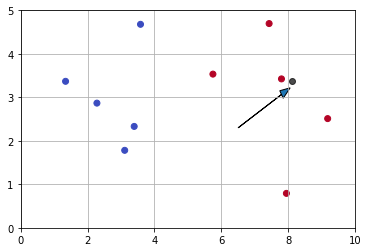

In [9]:
newX = 8.093607318
newY = 3.365731514

plt.scatter(df.x1, df.x2, c=df.y, cmap="coolwarm")
plt.scatter(newX, newY, color="black", alpha=0.7, marker="o")
minus = 0.3
plt.arrow(6.5, 2.3, newX - 6.5 - minus , newY - 2.3 - minus, head_width=0.2)
plt.xlim([0, 10])
plt.ylim([0, 5])
plt.grid();

See that new point? Of course that belongs to the "Red" class, but we need to find "Really?".

So to do that, we will find the distance between all the points. (This exercise is done just to show what is going on and you know...)

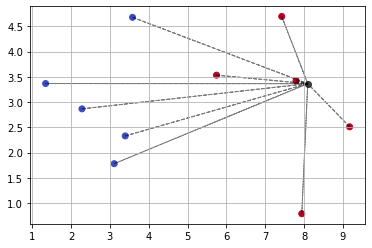

In [10]:
newX = 8.093607318
newY = 3.365731514

plt.scatter(df.x1, df.x2, c=df.y, cmap="coolwarm")
plt.scatter(newX, newY, color="black", alpha=0.7, marker="o")
for X, Y in df[["x1", "x2"]].values:
    plt.arrow(newX, newY, X - newX, Y - newY, alpha=0.5, ls="--")
plt.grid();

So, simply we will find the distance from our new data to the all other old data.

In [11]:
def EuclideanDistance(x1, x2, y1, y2):
    Sq_diff_x = (x1 - x2) ** 2
    Sq_diff_y = (y1 - y2) ** 2
    sum_x1_x2 = Sq_diff_x + Sq_diff_y
    return sum_x1_x2 ** 0.5 

In [12]:
distances = []
for x2, y2 in df[["x1", "x2"]].values:
    distances.append(EuclideanDistance(newX, x2, newY, y2))

In [13]:
distances

[4.812566907609877,
 5.229270827235305,
 6.749798999160064,
 4.6986266144110695,
 5.83460014556857,
 1.4900114024329525,
 2.354574897431513,
 1.3761132675144652,
 0.3064319992975,
 2.5786840957478887]

And if we compare it with our data...

In [14]:
df["distance"] = distances

In [15]:
df

,x1,x2,y,distance
0,3.393533,2.331273,0,4.812567
1,3.110073,1.781540,0,5.229271
2,1.343809,3.368361,0,6.749799
3,3.582294,4.679179,0,4.698627
4,2.280362,2.866990,0,5.834600
5,7.423437,4.696523,1,1.490011
6,5.745052,3.533990,1,2.354575
7,9.172169,2.511101,1,1.376113
8,7.792783,3.424089,1,0.306432
9,7.939821,0.791637,1,2.578684


Setting `k = 3`, which means top 3 nearest data points.

In [16]:
k = 3
nearest = df.sort_values(by="distance").head(3)
nearest

,x1,x2,y,distance
8,7.792783,3.424089,1,0.306432
7,9.172169,2.511101,1,1.376113
5,7.423437,4.696523,1,1.490011


In [17]:
nearest["y"].value_counts()

1    3
Name: y, dtype: int64

Here, we can see that class `1` has the highest votes of `3`. And class `1` is the only class in the selected region. So, the new datapoint **should belong to class `1`**.

# 

## Making Compact Class<br>— 
*Let's make a compact class as we always do, and make it so usable that we can work it out with any dataset and get the accuracy.*

We also need to take care of more than 2 features. In such case, we will find distance between 2 points using all features. And this time, I will try to make it a bit faster by NOT CONVERTING data into dataframe and will work solely with numpy.

In [18]:
import statistics

class KNN:
    def __init__(self, X: np.ndarray, y: list):
        X = np.array(X)
        y = np.array(y)
        if X.ndim != 2:
            raise NotImplementedError(\
            """
            The dimention of the features 
            must be 2D.
            """)
        if (len(X) != len(y)) or (y.ndim != 1):
            raise NotImplementedError(\
            """
            The length of features 
            and target mismatched.
            """)
        self.stored_X = X
        self.stored_y = y
        
    
    def predict(self, X: np.ndarray, k: int):
        X = np.array(X)
        if X.ndim != 2:
            raise NotImplementedError(\
            """
            The dimention of the features 
            must be 2D.
            """)
        pred_classes = []
        for each_row in X:
            distance = ((each_row - self.stored_X) ** 2).sum(1) ** 0.5
            sorted_k_indexes = np.argsort(distance)[:k]
            pred_class = statistics.mode(self.stored_y[sorted_k_indexes])
            pred_classes.append(pred_class)
        return pred_classes

In [82]:
model = KNN(df[["x1", "x2"]], df.y)

In [83]:
model.predict(df[["x1", "x2"]], k=1)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]

Wooh! It works!<br>
Let's try it on new dataset.

In [148]:
import seaborn as sns
from sklearn.model_selection import train_test_split
iris = sns.load_dataset("iris")

X = iris.drop("species", axis=1)
y = iris["species"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

In [149]:
model = KNN(Xtrain, ytrain)

In [150]:
pred = model.predict(Xtest, k=3)

In [151]:
(ytest == pred).sum() / len(ytest)

0.96

# —
## Freakin' awsome!
# —

If we change the K value...

In [152]:
pred = model.predict(Xtest, k=2)
(ytest == pred).sum() / len(ytest)

0.98

Bro!! Isn't that amazing!

# 

### We can stop here,
**BUT**, I want to implement a couple of other distances in our KNN model. So, let's implement them one by one.

###### 

#### Manhattan
# $$ MD = \sum|A - B|$$

In [26]:
A = np.array([12, 44, 33])
B = np.array([24, 22, 334])

In [27]:
def manhattan_distance(A, B):
    return abs((A - B)).sum()

In [28]:
manhattan_distance(A, B)

335

#### Hamming
*Used for categorical values (ie. when we have one hot encoded categories)*

# $$ HD = \frac {\sum | A - B |} {n}$$

In [29]:
A = np.array([0, 0, 1])
B = np.array([1, 0, 0])

In [30]:
def hamming_distance(A, B):
    return abs(A - B).sum() / len(A)

In [31]:
hamming_distance(A, B)

0.6666666666666666

# 

#### Minkowaski

# $$ MskD = \left(\sum |A - B|^p \right)^{(\frac{1}{p})} $$
$ p $ value has to be tuned.

In [32]:
def minkowski_distance(A, B, p):
	return (abs(A - B) ** p).sum() ** (1 / p)

In [33]:
A = np.array([10, 20, 15, 10, 5])
B = np.array([12, 24, 18, 8, 7])

In [34]:
minkowski_distance(A, B, 2)

6.082762530298219

# 

## So going simply...
I have only discussed 4 methods here, other 4 are not mostly used. But for the sake of implementation - let's try them in the class we've made.

In [1]:
%%writefile KNN.py

import statistics
import numpy as np

class KNN:
    """
    This model is so great. It also can work on 4 different
    types of distance metrics.
    
    First time, I tried to make a model entirely in numpy.
    Haven't used a single bit of pandas. It makes numpy stronger
    and calculation faster.
    
    
    How To
    ------
    
    >>> model = KNN(X, y)
    >>> pred = model.predict(X, k=3, dis_type="euclidean")
    """
    def __init__(self, X: np.ndarray, y: list):
        X = np.array(X)
        y = np.array(y)
        if X.ndim != 2:
            raise NotImplementedError(\
            """
            The dimention of the features 
            must be 2D.
            """)
        if (len(X) != len(y)) or (y.ndim != 1):
            raise NotImplementedError(\
            """
            The length of features 
            and target mismatched.
            """)
        self.stored_X = X
        self.stored_y = y
        
    
    def predict(self, X: np.ndarray, k: int, dis_type="euclidean", p=None):
        X = np.array(X)
        self.dis_type = dis_type
        if (self.dis_type == "minkowaski") and (p == None):
            raise NotImplementedError("Please provide `p` value.")
        self.p = p    
        if X.ndim != 2:
            raise NotImplementedError(\
            """
            The dimention of the features 
            must be 2D.
            """)
        pred_classes = []
        for each_row in X:
            distance = self.get_distance(row=each_row)
            sorted_k_indexes = np.argsort(distance)[:k]
            pred_class = statistics.mode(self.stored_y[sorted_k_indexes])
            pred_classes.append(pred_class)
        return pred_classes
    
    def get_distance(self, row):
        if self.dis_type == "euclidean":
            return ((row - self.stored_X) ** 2).sum(1) ** 0.5
        elif self.dis_type == "manhattan":
            return abs((row - self.stored_X)).sum(1)
        elif self.dis_type == "hamming":
            return abs(row - self.stored_X).sum(1) / len(row)
        elif self.dis_type == "minkowaski":
            return (abs(row - self.stored_X) ** self.p).sum(1) ** (1 / self.p)
        else:
            raise NotImplementedError(\
            f"""
            The distance type chosen is `{self.dis_type}`.
            Please choose from: 
            • euclidean
            • manhattan
            • hamming
            • minkowaski
            """)

Overwriting KNN.py


In [157]:
model = KNN(Xtrain, ytrain)

With Euclidean

In [159]:
pred = model.predict(Xtest, k=3, dis_type="euclidean")
(ytest == pred).sum() / len(ytest)

0.96

With Manhattan

In [160]:
pred = model.predict(Xtest, k=3, dis_type="manhattan")
(ytest == pred).sum() / len(ytest)

0.96

With Minkovaski

In [178]:
pred = model.predict(Xtest, k=7, dis_type="minkowaski", p=2)
(ytest == pred).sum() / len(ytest)

0.98

With Hamming

In [185]:
pred = model.predict(Xtest, k=3, dis_type="hamming")
(ytest == pred).sum() / len(ytest)

0.96

WORKS!

# 

### Now, let's try on **Pernguin** dataset.

In [127]:
df = sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [130]:
df.drop(["sex", "island"], axis=1, inplace=True)
df.dropna(inplace=True)

In [186]:
X = df.drop("species", axis=1)
y = df["species"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.33)

In [187]:
model = KNN(Xtrain, ytrain)

In [201]:
pred = model.predict(Xtest, k=2, dis_type="minkowaski", p=2)
(pred == ytest).sum() / len(ytest)

0.8672566371681416

# 

In [202]:
from sklearn.datasets import load_breast_cancer

In [203]:
X = load_breast_cancer()["data"]
y = load_breast_cancer()["target"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=.33)

In [204]:
model = KNN(Xtrain, ytrain)

In [221]:
pred = model.predict(Xtest, k=4, dis_type="minkowaski", p=2)
(pred == ytest).sum() / len(ytest)

0.9414893617021277

Kinda Kool.

# 

# That was so Amazing.
I feel really good after implementing such a simple but powerful algorithm. It is so simple to understand. Really.